In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use("ggplot")

In [2]:
tickers = ['ABB', 'ACC', 'ADANIPORTS', 'AMBUJACEM', 'ASHOKLEY', 'ASIANPAINT',
           'AUROPHARMA',  'AXISBANK', 'BAJAJ-AUTO', 'BAJFINANCE', 'BAJAJFINSV',
           'BAJAJHLDNG',  'BANKBARODA', 'BHEL', 'BPCL', 'BHARTIARTL',
           'BIOCON', 'BOSCHLTD', 'BRITANNIA', 'CADILAHC', 'CIPLA',
           'COALINDIA', 'COLPAL', 'CONCOR', 'DLF', 'DABUR', 'DIVISLAB', 'DRREDDY',
           'EICHERMOT', 'GAIL',  'GODREJCP', 'GRASIM', 'HCLTECH',
           'HDFCBANK', 'HAVELLS', 'HEROMOTOCO', 'HINDALCO', 'HINDPETRO',
           'HINDUNILVR', 'HINDZINC', 'HDFC', 'ICICIBANK', 'ITC',
            'IOC', 'INDUSINDBK', 'INFY',  'JSWSTEEL', 'KOTAKBANK',
           'LT', 'LUPIN', 'MRF', 'M&M', 'MARICO', 'MARUTI', 'MOTHERSUMI', 'NHPC',
           'NMDC', 'NTPC', 'ONGC', 'OFSS', 'PAGEIND', 'PETRONET', 'PIDILITIND', 'PEL',
           'PGHH', 'RELIANCE', 'SHREECEM', 'SRTRANSFIN', 'SIEMENS',
           'SBIN', 'SAIL', 'SUNPHARMA', 'TCS', 'TATAMTRDVR', 'TATAMOTORS', 'TATASTEEL',
           'TECHM', 'TITAN', 'UPL', 'ULTRACEMCO', 'UBL', 'MCDOWELL-N', 'VEDL',
           'IDEA', 'WIPRO', 'YESBANK', 'ZEEL']

In [3]:
df = pd.DataFrame(columns=['Date'])
df.set_index('Date', inplace=True)

for ticker in tickers:
    tdf = pd.read_csv('../data/{0}.csv'.format(ticker), parse_dates=True, index_col=0)
    df['{0}_Close'.format(ticker)] = tdf['Close']

df.dropna(inplace=True)
# df = pd.DataFrame(df.head(10))[['ABB_Close', 'ACC_Close', 'ADANIPORTS_Close', 'AMBUJACEM_Close', 'ASHOKLEY_Close']]

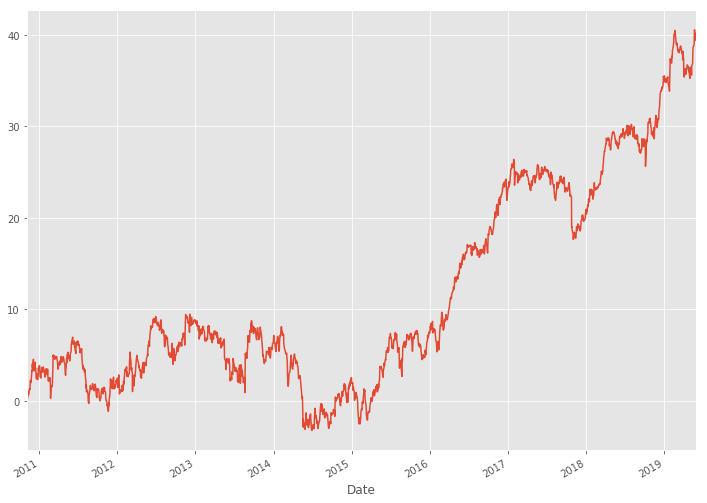

In [10]:
#1. Calculate the close-to-close returns for all stocks
retdf = df.pct_change().dropna()
#2. Calculate portfolio return by average of all returns
portfolio_ret = retdf.mean(axis=1)
#3. ret(i) - portfolio_ret, numerator
ret_minus_pret = retdf.sub(portfolio_ret, axis=0)
# sigma(ret(i)-portfolio_ret), denominator
denominator = ret_minus_pret.abs().sum(axis=1)
#Final hedge ratio
weights = -ret_minus_pret.div(denominator, axis=0)

weights = weights.shift(1).dropna() #drop first row, because we are computing weights of tomorrow at the close of today

dailyret = pd.DataFrame(index=retdf.index)
for ticker in tickers:
    dailyret["{0}_Close".format(ticker)] = 100*weights["{0}_Close".format(ticker)]*retdf["{0}_Close".format(ticker)]
dailyret['ret'] = dailyret.sum(axis=1)
dailyret['cumsum'] = dailyret['ret'].cumsum()
dailyret['cumsum'].plot(figsize=(12,9))

In [8]:
num = np.array([-0.000638 ,0.001103 , .006824 , -0.000659, 0.010204]) - (-0.000638 + 0.001103 + .006824 - 0.000659 + 0.010204)/5
denom = np.sum(num)
denom

-2.6020852139652106e-18

In [9]:

np.absolute(num/np.sum(np.absolute(num)))

array([0.19451352, 0.10995298, 0.16791654, 0.19553349, 0.33208346])